In [18]:
import pandas as pd

df = pd.read_csv('/kaggle/input/1dataset/uber.csv')  # Adjust if path differs
print("Dataset loaded with shape:", df.shape)



Dataset loaded with shape: (200000, 9)


In [19]:
# Dataset shape & columns
print(df.shape)
print(df.columns)

# Data types & info
print(df.info())

# Summary stats
print(df.describe())

# Missing values
print(df.isnull().sum())

# Check duplicates
print("Duplicate rows:", df.duplicated().sum())

# Preview data
print(df.head())


(200000, 9)
Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB
None
         Unnamed: 0    fare_amount  pickup_longitude  pickup_latitude  \


In [20]:
# Drop rows with missing essential info
df.dropna(subset=['pickup_datetime', 'pickup_latitude', 'pickup_longitude',
                  'dropoff_latitude', 'dropoff_longitude', 'fare_amount'], inplace=True)

# Remove invalid fares
df = df[(df['fare_amount'] > 0) & (df['fare_amount'] < 1000)]

# Filter lat/lon for NYC bounds
df = df[(df['pickup_latitude'].between(40, 42)) & 
        (df['pickup_longitude'].between(-75, -72)) &
        (df['dropoff_latitude'].between(40, 42)) & 
        (df['dropoff_longitude'].between(-75, -72))]

print("Shape after cleaning:", df.shape)


Shape after cleaning: (195787, 9)


In [21]:
df.to_csv('/kaggle/working/uber_cleaned.csv', index=False)
print("Cleaned dataset saved as uber_cleaned.csv")


Cleaned dataset saved as uber_cleaned.csv


In [22]:
import numpy as np

print("Mean fare:", df['fare_amount'].mean())
print("Median fare:", df['fare_amount'].median())
print("Mode fare:", df['fare_amount'].mode()[0])
print("Standard deviation fare:", df['fare_amount'].std())

# Quartiles
print("Quartiles for fare_amount:")
print(df['fare_amount'].quantile([0.25, 0.5, 0.75]))

# Outlier detection (IQR method)
Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['fare_amount'] < Q1 - 1.5*IQR) | (df['fare_amount'] > Q3 + 1.5*IQR)]
print("Number of outliers detected:", outliers.shape[0])


Mean fare: 11.343253995413383
Median fare: 8.5
Mode fare: 6.5
Standard deviation fare: 9.794152902308667
Quartiles for fare_amount:
0.25     6.0
0.50     8.5
0.75    12.5
Name: fare_amount, dtype: float64
Number of outliers detected: 16740


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


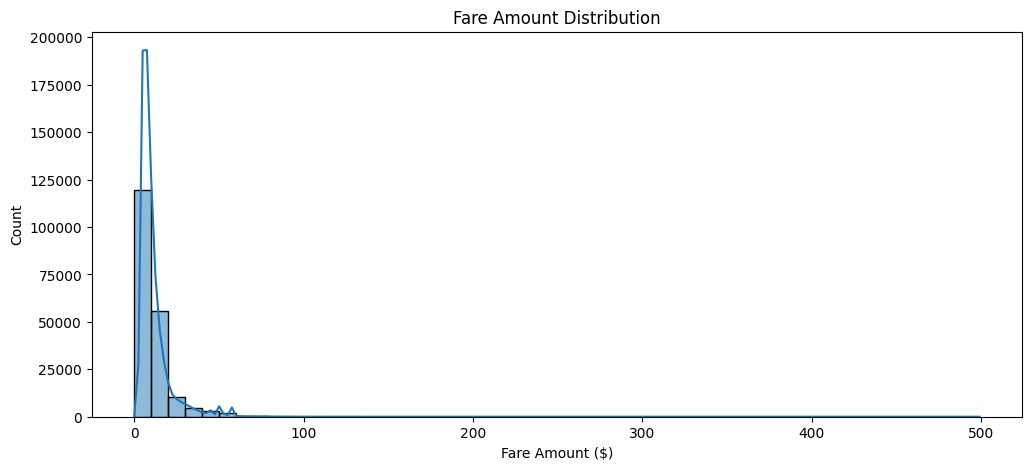

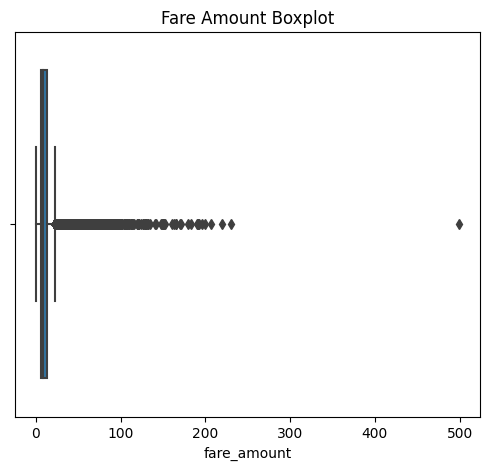

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))
sns.histplot(df['fare_amount'], bins=50, kde=True)
plt.title("Fare Amount Distribution")
plt.xlabel("Fare Amount ($)")
plt.show()

plt.figure(figsize=(6,5))
sns.boxplot(x=df['fare_amount'])
plt.title("Fare Amount Boxplot")
plt.show()


In [26]:
from geopy.distance import geodesic

# Convert pickup_datetime
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')
df.dropna(subset=['pickup_datetime'], inplace=True)

# Extract time features
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day
df['month'] = df['pickup_datetime'].dt.month
df['weekday'] = df['pickup_datetime'].dt.day_name()

# Calculate distance in km
def calc_distance(row):
    pickup = (row['pickup_latitude'], row['pickup_longitude'])
    dropoff = (row['dropoff_latitude'], row['dropoff_longitude'])
    return geodesic(pickup, dropoff).km

df['distance_km'] = df.apply(calc_distance, axis=1)


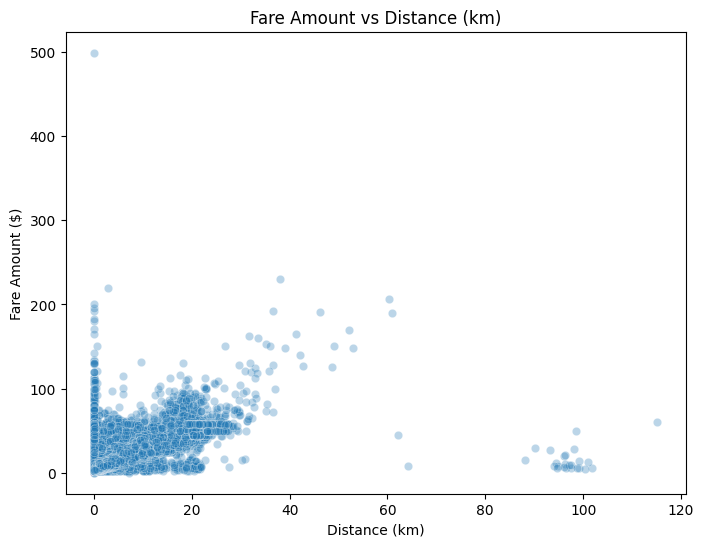

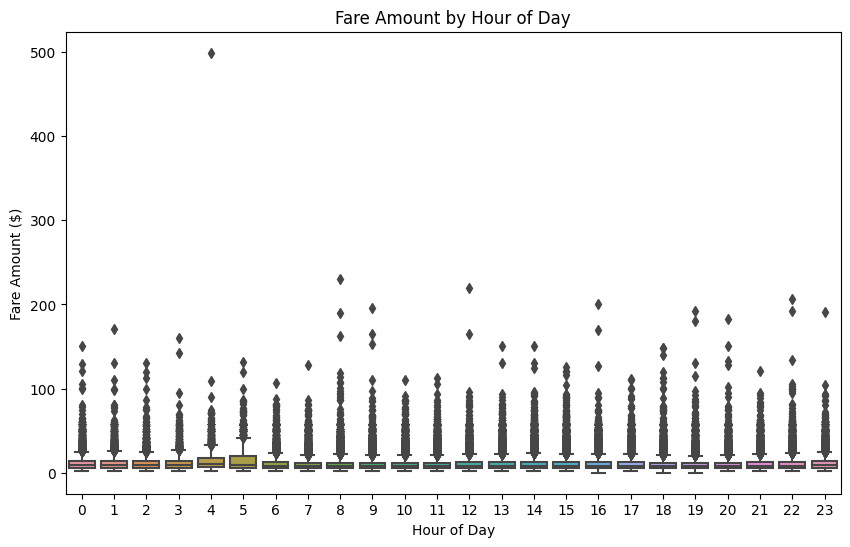

In [27]:
# Fare vs Distance scatterplot
plt.figure(figsize=(8,6))
sns.scatterplot(x='distance_km', y='fare_amount', data=df, alpha=0.3)
plt.title("Fare Amount vs Distance (km)")
plt.xlabel("Distance (km)")
plt.ylabel("Fare Amount ($)")
plt.show()

# Fare vs Hour boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x='hour', y='fare_amount', data=df)
plt.title("Fare Amount by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Fare Amount ($)")
plt.show()


In [34]:
# Peak hour flag: 7-9 AM and 5-7 PM
df['is_peak'] = df['hour'].apply(lambda x: 1 if 7 <= x <= 9 or 17 <= x <= 19 else 0)


In [40]:
print("Columns before encoding:", df.columns.tolist())


Columns before encoding: ['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month', 'distance_km', 'is_peak', 'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday', 'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday']


In [41]:
# Your dataset already has one-hot encoded weekday columns.

# Export cleaned and enhanced dataset (with weekday dummies)
df.to_csv('/kaggle/working/uber_enhanced.csv', index=False)
print("Enhanced dataset saved.")


Enhanced dataset saved.


In [44]:
print(df.columns.tolist())


['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month', 'distance_km', 'is_peak', 'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday', 'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday']


In [45]:
# Remove duplicate columns (keep first occurrence)
df = df.loc[:, ~df.columns.duplicated()]

# Confirm it's fixed
print("✅ Final columns:")
print(df.columns.tolist())


✅ Final columns:
['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month', 'distance_km', 'is_peak', 'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday']


In [46]:
df.to_csv('/kaggle/working/uber_enhanced_final.csv', index=False)
print("✅ Final enhanced dataset saved as 'uber_enhanced_final.csv'")


✅ Final enhanced dataset saved as 'uber_enhanced_final.csv'
